In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set a nice theme
sns.set(style='whitegrid')

# Load the cleaned dataset
df = pd.read_csv('student+performance/student/student_combined_processed.csv', sep=',')

print("Data loaded successfully!")
print("Shape:", df.shape)
df.head()

Data loaded successfully!
Shape: (1044, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,subject,G3,pass
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,0,6,0
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,0,6,0
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,0,10,1
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,0,15,1
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,0,10,1


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Features and target
X = df.drop(columns=['pass', 'G3'])  # Only use features, exclude classification target and regression label
y = df['G3']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features (important for linear regression & boosting)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Step 2: Train Regression Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Train and evaluate
for name, model in models.items():
    if name == 'Linear Regression' or name == 'Gradient Boosting':
      model.fit(X_train_scaled, y_train)
      preds = model.predict(X_test_scaled)
    else:
      model.fit(X_train, y_train)
      preds = model.predict(X_test)
    rmse = mean_squared_error(y_test, preds)
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)

    print(f"\n {name}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R² Score: {r2:.2f}")


 Linear Regression
RMSE: 13.40
MAE: 2.62
R² Score: 0.13

 Random Forest
RMSE: 11.86
MAE: 2.50
R² Score: 0.23

 Gradient Boosting
RMSE: 11.22
MAE: 2.48
R² Score: 0.27


In [3]:
# Feature importance from Random Forest
rf_model = models['Random Forest']  # get the trained model

importances = rf_model.feature_importances_
feature_names = X.columns
sorted_idx = np.argsort(importances)[::-1]

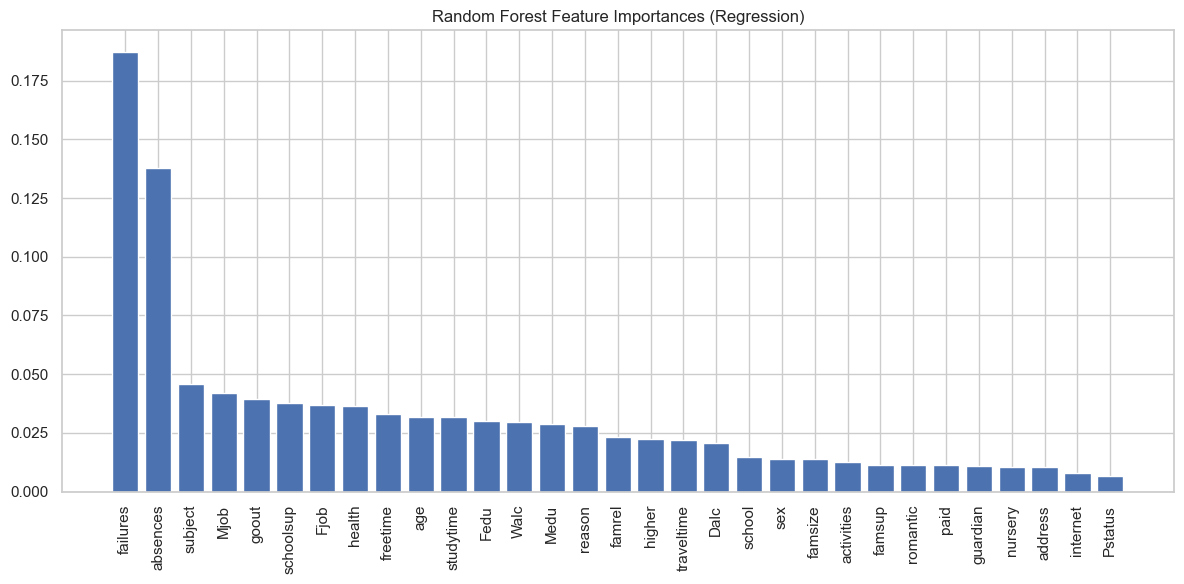

In [4]:
# Get the plot of the important features for random forest
plt.figure(figsize=(12, 6))
plt.bar(range(len(importances)), importances[sorted_idx])
plt.xticks(range(len(importances)), feature_names[sorted_idx], rotation=90)
plt.title("Random Forest Feature Importances (Regression)")
plt.tight_layout()
plt.show()

In [5]:
# Print top 10 most important features
print("Top 10 Important Features:")
for i in range(10):
    print(f"{feature_names[sorted_idx[i]]}: {importances[sorted_idx[i]]:.4f}")

Top 10 Important Features:
failures: 0.1870
absences: 0.1377
subject: 0.0459
Mjob: 0.0418
goout: 0.0394
schoolsup: 0.0379
Fjob: 0.0369
health: 0.0363
freetime: 0.0331
age: 0.0318


In [6]:
import joblib
import os

# Define the full path to your Google Drive models directory
save_path = "models"

# Ensure the directory exists
os.makedirs(save_path, exist_ok=True)

# Save each trained model into the Google Drive folder
for name, model in models.items():
    filename = f"{save_path}/{name.lower().replace(' ', '_')}_regression_model.joblib"
    joblib.dump(model, filename)
    print(f"Saved: {filename}")

Saved: models/linear_regression_regression_model.joblib
Saved: models/random_forest_regression_model.joblib
Saved: models/gradient_boosting_regression_model.joblib


In [7]:
print(df.columns.tolist())

['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'subject', 'G3', 'pass']
